<a href="https://colab.research.google.com/github/adgcal/Anjan_collab_R/blob/main/boolean_lacoperon_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

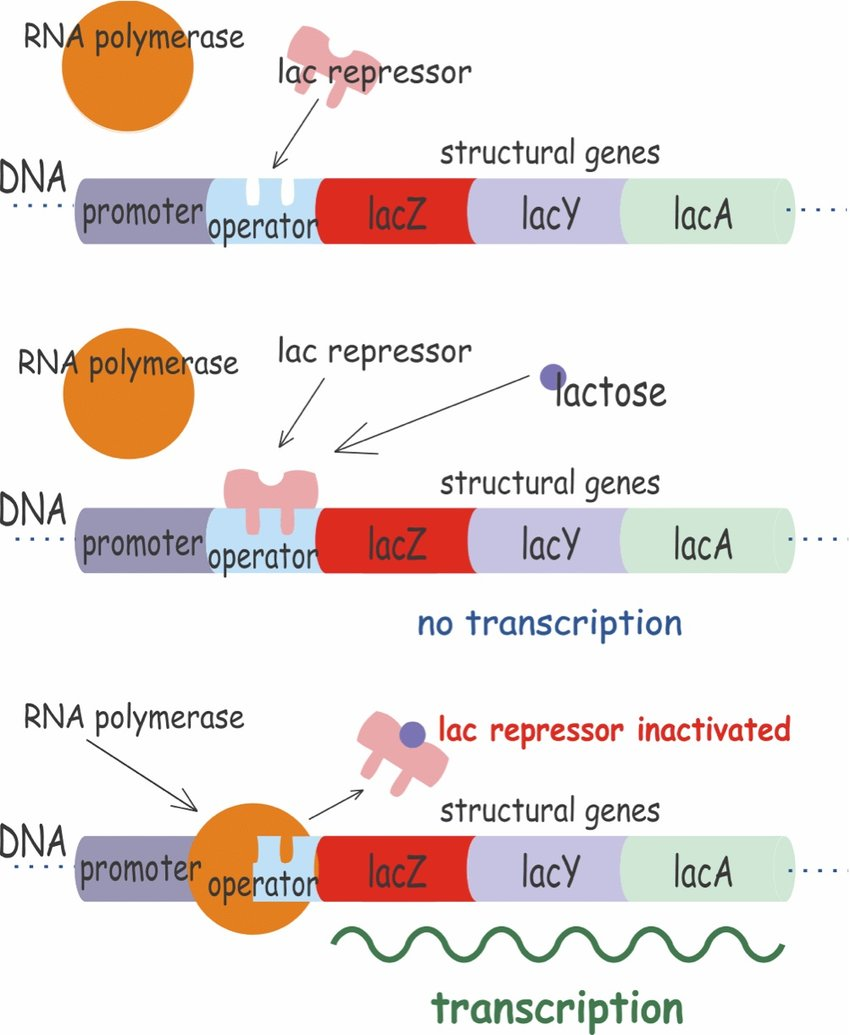

# The logical description of lac operon 

# 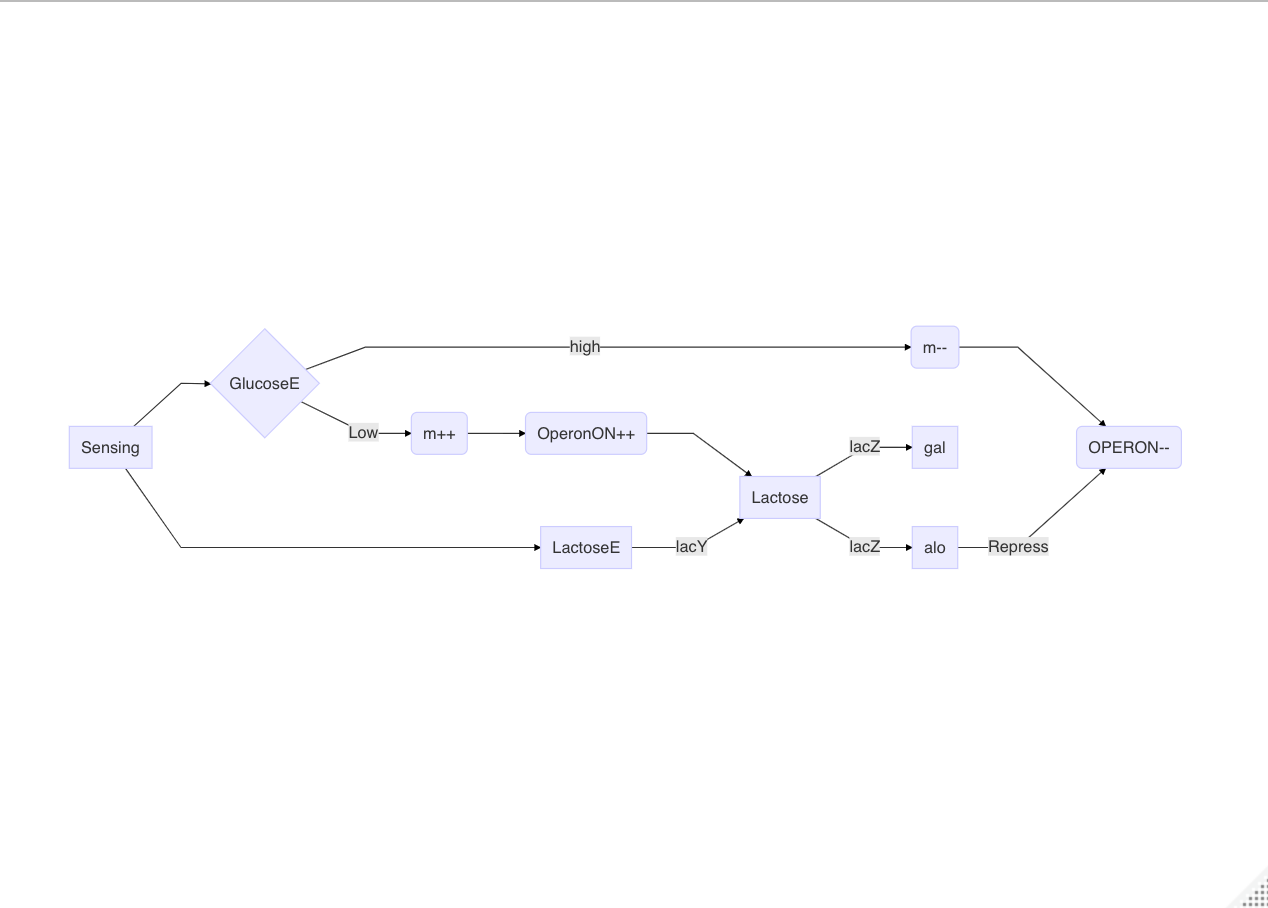

In [ ]:
start_time <- Sys.time()
system.time({
  devtools::install_github("cole-trapnell-lab/leidenbase", upgrade = "never")
  devtools::install_github("lambdamoses/SeuratBasics", upgrade = "never", Ncpus = 2)
})

![](lacoper.png)

In [13]:
install.packages("gtools", repos="https://cran.rstudio.com/")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [14]:
library(gtools)


Attaching package: ‘gtools’


The following object is masked from ‘package:igraph’:

    permute




In [15]:
u<-c(TRUE,FALSE)
s=permutations(n=2,r=3,u,repeats.allowed=T)


The operon is ON when mRNA is being produced (M = 1). When mRNA is present, the production of permease and $\beta$-galactosidase is also turned on. This corresponds to the *fixed point 1*
\begin{equation}
(M, E, L) = (1, 1, 1)
\end{equation}

On the other hand, when mRNA is not made, the operon is OFF. This also means no production of lactose permease, and $\beta$-galactosidase. This corresponds to the *fixed-point state 2:
\begin{equation}
(M, E, L) = (0, 0, 0)
\end{equation}

# Four possible external controls
Let Le and Ge are external lactose and glucose 
\begin{align}
Le = 0,Ge = 0\\
Le = 0,Ge = 1\\
Le = 1,Ge = 0\\
Le = 1,Ge = 1 
\end{align}

In [17]:
library(igraph)

# Boolean assumptions for the Lac Operon 
## The Boolean model is built under the assumptions:
- Transcription and translation require one unit of time.This means that if all necessary conditions for the activation of the molecular mechanism are present at time t, the protein production will be happening in time t + 1; 2)
- Degradation of all mRNA and proteins occurs in one time step
- We assume that the values of L and E will be considered to be 1 when levels of lactose and lacZ polypeptide are measurably higher than the basal level, otherwise they will assume null values.



In [18]:
library(gtools)
x <- c(1,  0)
s=permutations(n=2,r=3,v=x,repeats.allowed=T)
ss=matrix(nrow=8,ncol=1)
for (i in 1:8){
  j<-paste(s[i,],collapse="")
  ss[i]<-j}
# The above stores the master of all Boolean states FOR A TRIPLET STATE MEL
print(ss)


     [,1] 
[1,] "000"
[2,] "001"
[3,] "010"
[4,] "011"
[5,] "100"
[6,] "101"
[7,] "110"
[8,] "111"


# Boolean Equation

What is logical in lac operon is evident from the following Boolean equations:
\begin{align}
f_M(t+1)=\neg Ge(t) \land (L(t)\lor Le(t))\\
f_E(t+1)=M(t)\\
f_L(t + 1) = \neg Ge(t)\land (E(t) \lor Le(t))
\end{align}





In [32]:
ftrans<-function(LE,GE,v){
  x1<-v[1]
  x2<-v[2]
  x3<-v[3]
  f1<-!GE && (v[3]||LE)
  f2<- v[1]
  f3<- !GE && (v[2]||LE)
  ff<-c(f1,f2,f3)
 return(as.numeric(ff))
}
s[4,]
w<-ftrans(0,0,s[2,])
w

[1] 0 1 1

[1] 1 0 0

In [33]:
matform<-function(LE,GE,s){
  A<-matrix(rep(0,64),8,8)
  for (i in 1:8){
    v<-s[i,]
    w<-ftrans(LE,GE,s[i,])
    jk<-which (w==v)
  A[jk,i]<-1
                }
  rownames(A)<-ss
  colnames(A)<-c("000", "001", "010", "011", "100" ,"101" ,"110", "111")
  return(A)
  
}

In [37]:
A<-matform(0,0,s)

In [38]:
g2 <- graph_from_adjacency_matrix(A, weighted=TRUE)
print(g2)

IGRAPH aefc1a2 DNW- 8 12 -- 
+ attr: name (v/c), weight (e/n)
+ edges from aefc1a2 (vertex names):
 [1] 000->000 000->010 000->101 000->111 001->000 001->001 001->110 001->111
 [9] 010->000 010->011 010->100 010->111


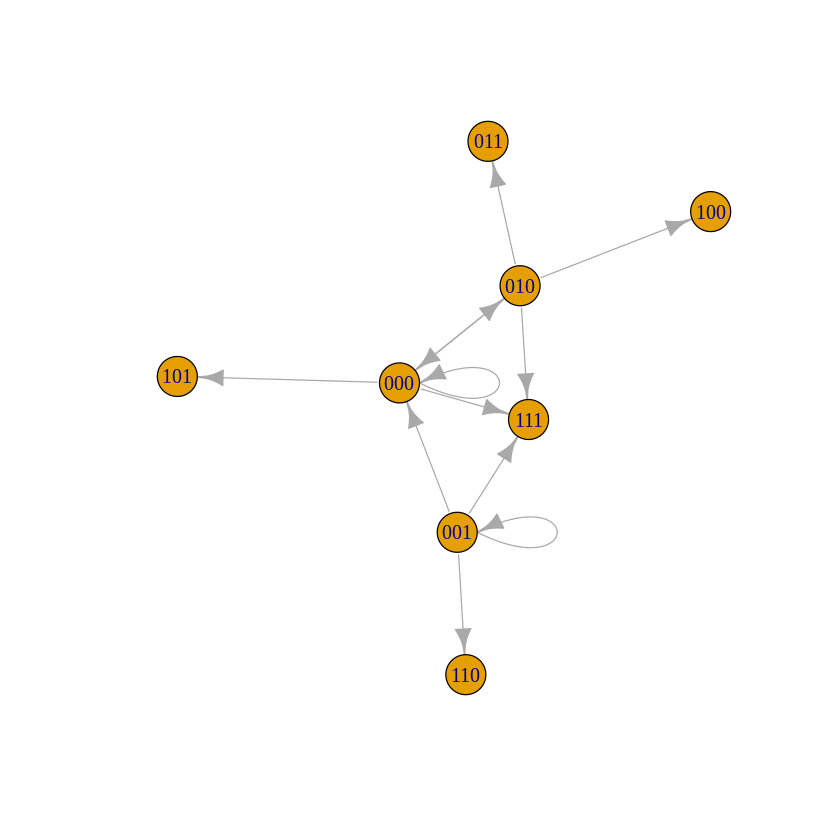

In [39]:
plot(g2)

In [40]:
# Truth Table for LE=0,GE=0
tt=list()
tt<-matrix(nrow=8,ncol=6)
for (i in 1:8){
  tt[i,]<-c(s[i,],ftrans(0,0,s[i,]))
}
#knitr::kable(tt)

In [41]:
# The  transition for LE=0,GE=0

|  t |  t | t  | t+1  |t+1   | t+1  |
|--:|--:|--:|--:|--:|--:|
|  0|  0|  0|  0|  0|  0|
|  0|  0|  1|  1|  0|  0|
|  0|  1|  0|  0|  0|  1|
|  0|  1|  1|  1|  0|  1|
|  1|  0|  0|  0|  1|  0|
|  1|  0|  1|  1|  1|  0|
|  1|  1|  0|  0|  1|  1|
|  1|  1|  1|  1|  1|  1|

In [46]:
B<-matform(0,1,s)

In [43]:
g2 <- graph_from_adjacency_matrix(B, weighted=TRUE)
print(g2)

IGRAPH 6fc92c0 DNW- 8 12 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 6fc92c0 (vertex names):
 [1] 000->000 000->001 000->010 000->011 001->000 001->001 001->110 001->111
 [9] 010->000 010->010 010->100 010->110


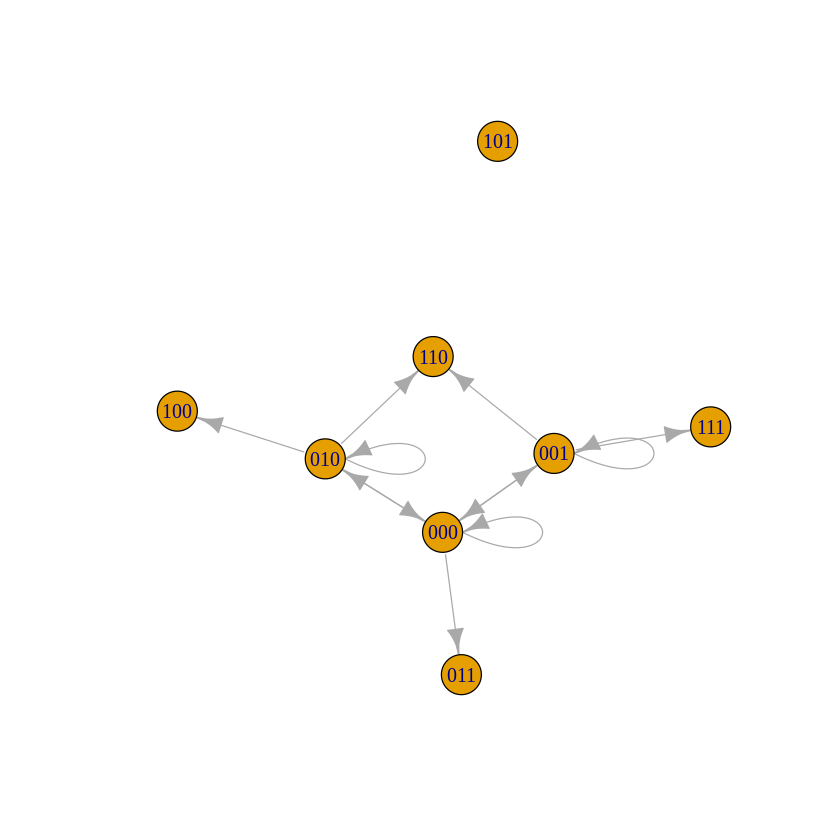

In [44]:
plot(g2)

In [47]:
C<-matform(1,0,s)

In [48]:
g2 <- graph_from_adjacency_matrix(C, weighted=TRUE)
print(g2)

IGRAPH 48faec3 DNW- 8 12 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 48faec3 (vertex names):
 [1] 000->100 000->101 000->110 000->111 001->000 001->001 001->110 001->111
 [9] 010->001 010->011 010->101 010->111


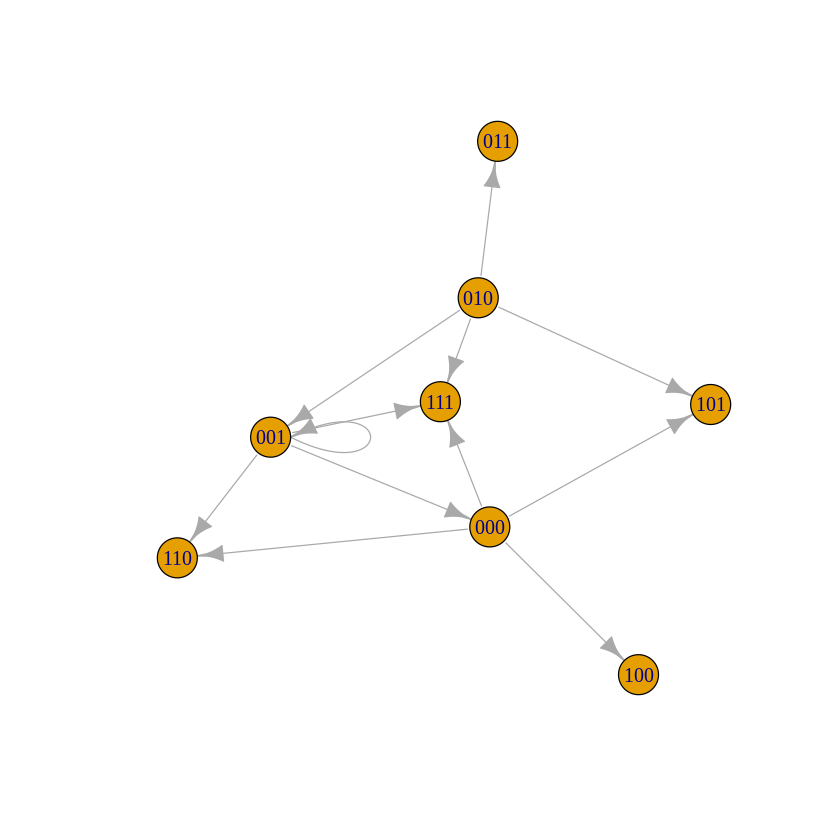

In [49]:
plot(g2)

In [51]:
D<-matform(1,1,s)

In [52]:
g2 <- graph_from_adjacency_matrix(D, weighted=TRUE)
print(g2)

IGRAPH 9348da0 DNW- 8 12 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 9348da0 (vertex names):
 [1] 000->000 000->001 000->010 000->011 001->000 001->001 001->110 001->111
 [9] 010->000 010->010 010->100 010->110


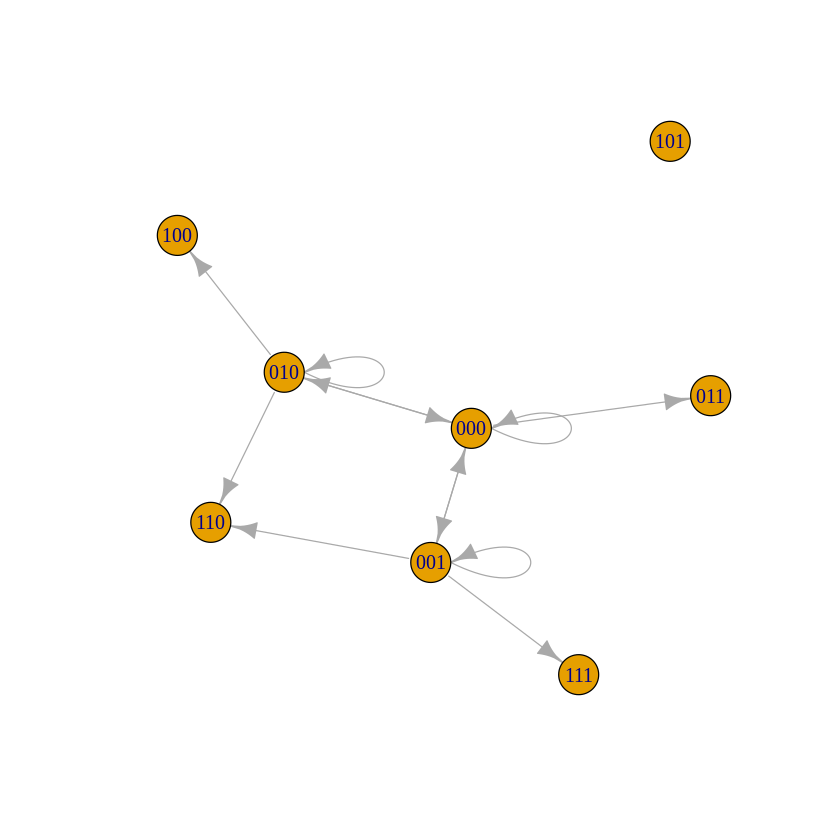

In [53]:
plot(g2)